### Practical Lab: Univariate Linear Regression on California Housing Prices

| Student Name  | Student ID | Methodology                |
|---------------|------------|----------------------------|
| Haysam Elamin | 8953681    | Machine Learning Workflow  |

---

### Framing the Problem

**Objective:**  
To understand how different factors influence housing prices in California, three separate univariate linear regression models will be built. Each model will predict the **median house value** (median_house_value) using one of the following independent variables:

1. **Median Income** (median_income)
2. **Population** (population)
3. **Number of Households** (households)

**Approach:**  
- For each independent variable, we will:
  - Fit a linear regression model.
  - Visualize the regression line and data.
  - Interpret the results and compare the predictive power of each variable.

---

### 1. Introduction

The data pertains to the houses found in a given California district and some summary stats.[1] By running three separate regressions, we can assess which factor is most strongly associated with house values and gain insights for further modeling.

[1] Kaggle website -  California Housing Prices



In [138]:
# After using pip to install needed packages
#importing dependencies

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


## 2. Getting the Data

[California Housing Dataset Source (Kaggle)](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

Loading the dataset into a Pandas DataFrame for analysis.

In [139]:
# using a variable to store the path to the CSV file
DataPath = 'DataSet/housing.csv'
# Reading the CSV file into a DataFrame
df = pd.read_csv(DataPath)
# Displaying the first few rows of the DataFrame
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## 3. Exploratory Data Analysis (EDA)


1. Explore summary statistics of the dataset.
2. Visualize relationships between 
**median house** value and three independent variables: 
- median income 
- population 
- number of households.

3. Describe the four variables.

In [140]:
# Display summary statistics for the dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [141]:
# Check for missing values in each column
print(df.isnull().sum())
# To fill missing values, we can use the mean of the column
# df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True) 
# In this lab, Total_bedroom is not one of the three independent variables.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [142]:
print(df.info()) 
# To get more insight into the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [143]:
# Display min, max, mean, and median for the four key variables
# this method accept a dataframe column and print the (min, max,meanand median)
def print_stats(column):
    print(f"Min:  {column.min()}")
    print(f"Max: {column.max()}")
    print(f"Mean:  {column.mean()}")
    print(f"Median:  {column.median()}")

#printing the result of the function with median_income
print('#-------------Stats for the median_income--------# ')
print_stats(df['median_income'])
#printing the result of the function with population
print('#----------------Stats for the population--------------#')
print_stats(df['population'])
#printing the result of the function with households
print('#------------Stats for the households------------#')
print_stats(df['households'])
#printing the result of the function with median_house_value
print('#----------Stats for the median_house_value-----------#')
print_stats(df['median_house_value'])   

#-------------Stats for the median_income--------# 
Min:  0.4999
Max: 15.0001
Mean:  3.8706710029069766
Median:  3.5347999999999997
#----------------Stats for the population--------------#
Min:  3.0
Max: 35682.0
Mean:  1425.4767441860465
Median:  1166.0
#------------Stats for the households------------#
Min:  1.0
Max: 6082.0
Mean:  499.5396802325581
Median:  409.0
#----------Stats for the median_house_value-----------#
Min:  14999.0
Max: 500001.0
Mean:  206855.81690891474
Median:  179700.0


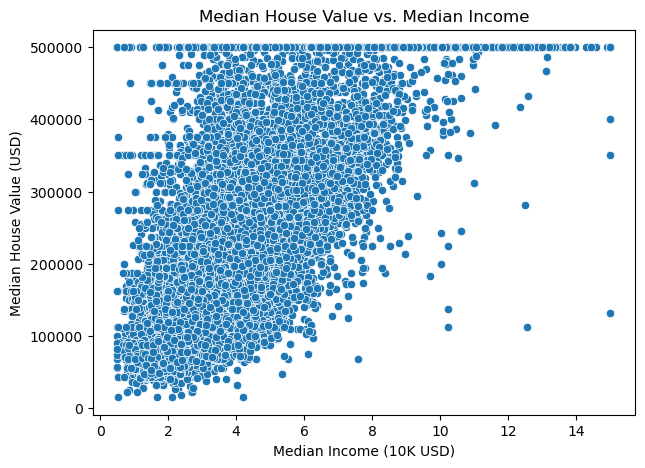

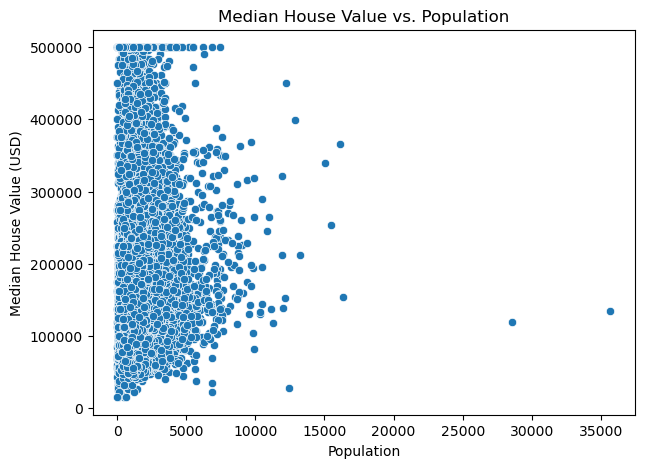

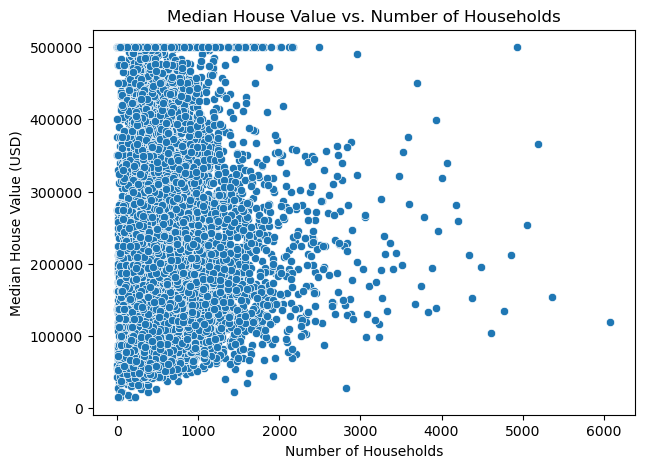

In [144]:
# Scatter plot: Median House Value vs. Median Income
plt.figure(figsize=(7, 5))
# Independent variable: median_income, Dependent variable: median_house_value
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income (10K USD)')
plt.ylabel('Median House Value (USD)')
plt.show()

plt.figure(figsize=(7, 5))
# Independent variable: population, Dependent variable: median_house_value
sns.scatterplot(x='population', y='median_house_value', data=df)
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value (USD)')
plt.show()

# Scatter plot: Median House Value vs. Households
# Independent variable: households, Dependent variable: median_house_value
plt.figure(figsize=(7, 5))
sns.scatterplot(x='households', y='median_house_value', data=df)
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value (USD)')
plt.show()

## 4. Linear Regression Fitting

Fit three separate linear regression models to predict **median house value** using:
1. Median income
2. Population
3. Number of households

Steps :
- Fit the regression using scikit-learn
- Display the regression equation
- Plot the regression line and data points

In [145]:
# --------------1-  Fit model: median_income vs. median_house_value --------------#
X1 = df[['median_income']].values
y = df['median_house_value'].values # y is the same in all 3 models 
model1 = LinearRegression()
model1.fit(X1, y)
print(f"1-  median_income vs median_house_value")
print(f"    Equation: y = {model1.intercept_:.2f} + {model1.coef_[0]:.2f}*median_income\n")

# ----------------------  2- Fit model: population vs. median_house_value-----------#
X2 = df[['population']].values
model2 = LinearRegression()
model2.fit(X2, y)
print(f"2- population vs median_house_value")
print(f"    Equation: y = {model2.intercept_:.2f} + {model2.coef_[0]:.2f}*population\n")

# ---------------- 3- Fit model: households vs. median_house_value ------------------#
X3 = df[['households']].values
model3 = LinearRegression()
model3.fit(X3, y)
print(f"3- households vs median_house_value")
print(f"    Equation: y = {model3.intercept_:.2f} + {model3.coef_[0]:.2f}*households")

1-  median_income vs median_house_value
    Equation: y = 45085.58 + 41793.85*median_income

2- population vs median_house_value
    Equation: y = 210436.26 + -2.51*population

3- households vs median_house_value
    Equation: y = 196928.58 + 19.87*households


**Plotting the 3 linear regressions**

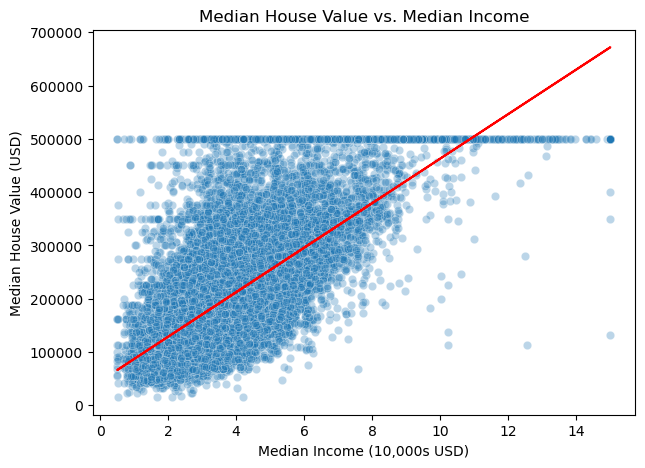

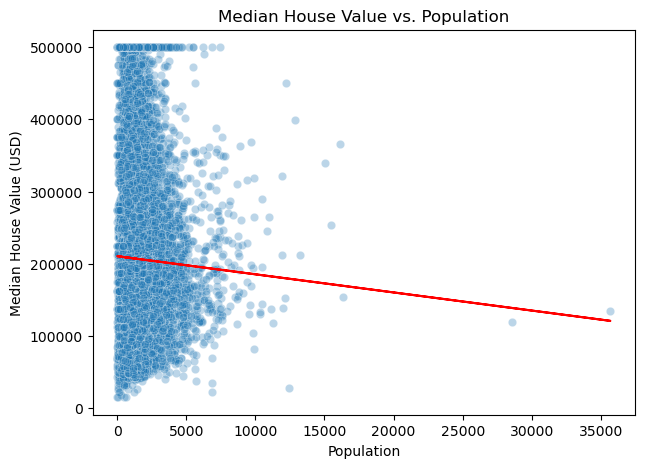

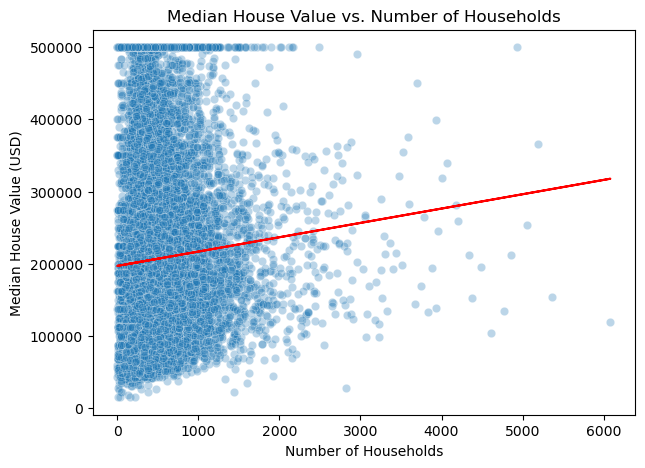

In [146]:
#--------------------- Plot 1:median_income vs median_house_value-------------------------------#
plt.figure(figsize=(7, 5))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.3)
plt.plot(df['median_income'], model1.predict(X1), color='red')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income (10,000s USD)')
plt.ylabel('Median House Value (USD)')
plt.show()

#------------------------ Plot 2: population vs median_house_value --------------------------------#
plt.figure(figsize=(7, 5))
sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.3)
plt.plot(df['population'], model2.predict(X2), color='red')
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value (USD)')
plt.show()

# ----------------------- Plot 3: households vs median_house_value --------------------------------#
plt.figure(figsize=(7, 5))
sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.3)
plt.plot(df['households'], model3.predict(X3), color='red')
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value (USD)')
plt.show()

## 5. Linear Regression Results Summary Table



Calculate Mean Squared Error (MSE)

In [147]:
# ----------------------- 1. MSE for median_income vs median_house_valu model--------------------#
mse1 = mean_squared_error(y, model1.predict(X1))  #actual data vs predicted data from the model 
print(f"1- MSE (median_income vs median_house_value): {mse1:.2f}")

# ----------------------- 2. MSE for population vs median_house_value model -----------------------#
mse2 = mean_squared_error(y, model2.predict(X2))
print(f"2- MSE (population vs median_house_value): {mse2:.2f}")

#------------------------- 3. MSE for households vs median_house_value model------------------------#
mse3 = mean_squared_error(y, model3.predict(X3))
print(f"3- MSE (households vs median_house_value): {mse3:.2f}")

1- MSE (median_income vs median_house_value): 7011311502.93
2- MSE (population vs median_house_value): 13307412412.39
3- MSE (households vs median_house_value): 13257776904.73


**Calculate Mean Absolute Error (MAE)**

In [148]:
#------------------------ 1. MAE for median_income vs median_house_val model------------------------#
mae1 = mean_absolute_error(y, model1.predict(X1))
print(f"1- MAE (median_income vs median_house_value): {mae1:.2f}")

#------------------------- 2. MAE for population vs median_house_value model model-------------------#
mae2 = mean_absolute_error(y, model2.predict(X2))
print(f"2- MAE (population vs median_house_value): {mae2:.2f}")

# ------------------------ 3. MAE for households vs median_house_value model--------------------------#
mae3 = mean_absolute_error(y, model3.predict(X3))
print(f"3-  MAE (households vs median_house_value): {mae3:.2f}")

1- MAE (median_income vs median_house_value): 62625.93
2- MAE (population vs median_house_value): 91153.82
3-  MAE (households vs median_house_value): 90802.74


#### 6- Addin the result in one table using pandas datdframe

In [149]:
# Print all the values in one table 
results = {
    "Model": ["Median Income", "Population", "Households"], # the models 
    "Intercept": [model1.intercept_, model2.intercept_, model3.intercept_], # value of the intercept
    "Slope": [model1.coef_[0], model2.coef_[0], model3.coef_[0]], # the value of the slope
    "MSE": [mse1, mse2, mse3], # MSE values 
    "MAE": [mae1, mae2, mae3]  # MAE Values 
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

           Model      Intercept         Slope           MSE           MAE
0  Median Income   45085.576703  41793.849202  7.011312e+09  62625.933791
1     Population  210436.262076     -2.511753  1.330741e+10  91153.820095
2     Households  196928.577162     19.872775  1.325778e+10  90802.743243


####  Plotting the three models using calculated Data  


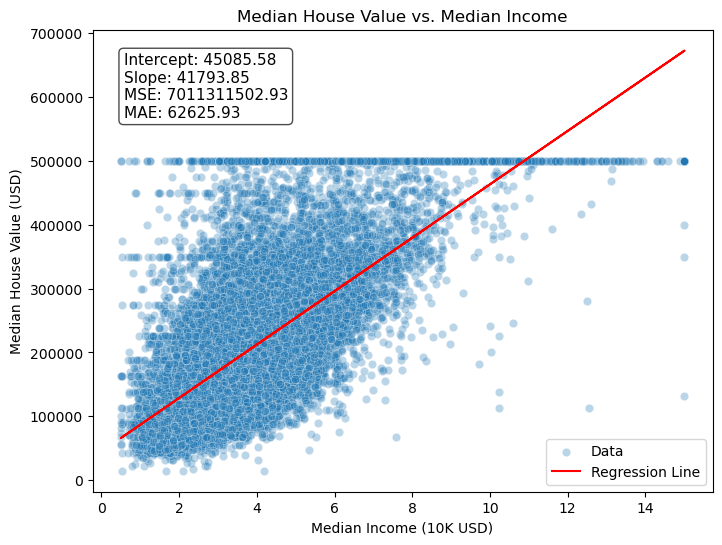

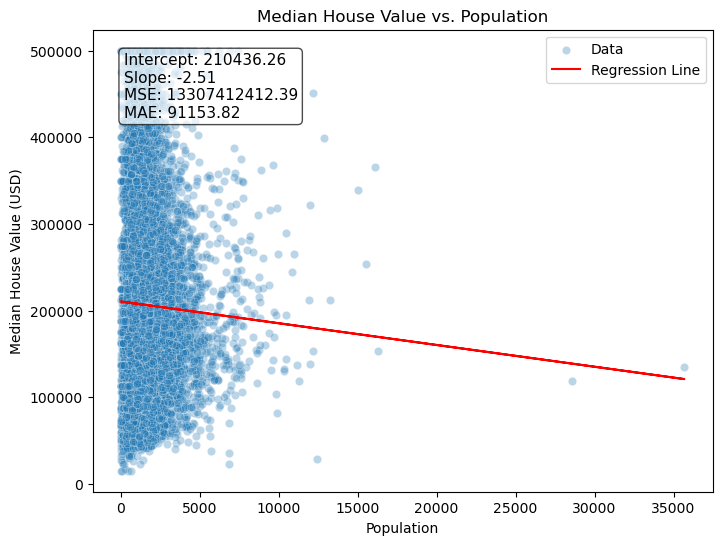

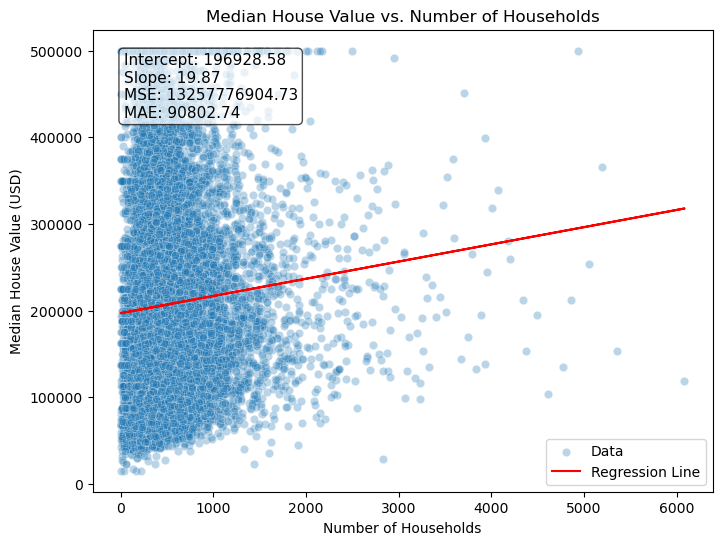

In [150]:
# All the values that are neede to create the new plot have been calculated 

#----------------------- 1. plot median_income vs median_house_value--------------------------#
plt.figure(figsize=(8, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.3, label='Data')
plt.plot(df['median_income'], model1.predict(X1), color='red', label='Regression Line')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income (10K USD)')
plt.ylabel('Median House Value (USD)')
textstr = '\n'.join((
    f'Intercept: {model1.intercept_:.2f}',
    f'Slope: {model1.coef_[0]:.2f}',
    f'MSE: {mse1:.2f}',
    f'MAE: {mae1:.2f}'
))
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.legend()
plt.show()


#----------------------------- 2.plot population vs median_house_value -----------------------#
plt.figure(figsize=(8, 6))
sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.3, label='Data')
plt.plot(df['population'], model2.predict(X2), color='red', label='Regression Line')
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value (USD)')
textstr = '\n'.join((
    f'Intercept: {model2.intercept_:.2f}',
    f'Slope: {model2.coef_[0]:.2f}',
    f'MSE: {mse2:.2f}',
    f'MAE: {mae2:.2f}'
))
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.legend()
plt.show()


#---------------------------------- 3.plot households vs median_house_value ------------------------#
plt.figure(figsize=(8, 6))
sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.3, label='Data')
plt.plot(df['households'], model3.predict(X3), color='red', label='Regression Line')
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value (USD)')
textstr = '\n'.join((
    f'Intercept: {model3.intercept_:.2f}',
    f'Slope: {model3.coef_[0]:.2f}',
    f'MSE: {mse3:.2f}',
    f'MAE: {mae3:.2f}'
))
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.legend()
plt.show()

## 7. Summary and Conclusion

**Three models were built to predict house prices (median_house_value):** 
- The first model used median_income to see how income affects house prices. 
- The second model used population to study its effect on house prices. 
- The third model used the number of households to examine its relationship with house prices. 

**To compare the accuracy of the models** 
- A statistical error measurement called MAE (Mean Absolute Error) was used . 
- A lower MAE means the model is more accurate. 

**Conclusion** 
- The model that used median_income had the lowest MAE, which means it was the most accurate of the three models for predicting house prices.